# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [1]:
import numpy as np
import pandas as pd

In [3]:
def f1(x) : 
    return np.exp(x) * np.log10(x)

N = 10000
np.random
u = np.random.uniform(1, 3, N)
fx = np.mean(f1(u))*(3 - 1)

In [4]:
def f2(y) : 
    return np.sin(y) * np.log(y)

N = 10000
np.random
u = np.random.uniform(1, 3, N)
fy = np.mean(f2(u))*(3 - 1)

In [5]:
N = np.logspace(1, 5, 5)
tabla = pd.DataFrame(columns=["f(x)", "f(y)"], index = N)
tabla

,f(x),f(y)
10.0,NaN,NaN
100.0,NaN,NaN
1000.0,NaN,NaN
10000.0,NaN,NaN
100000.0,NaN,NaN


In [6]:
def montecarlo(f, N, a, b):
    u = np.random.uniform(a, b, N)
    return np.mean(f(u))*(b - a)
N

array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])

In [12]:
a = 1
b = 3

for i in N:
    fx = montecarlo(f1, int(i), a, b)
    fy = montecarlo(f2, int(i), a, b)
    tabla.loc[i, "f(x)"] = fx
    tabla.loc[i, "f(y)"] = fy
tabla

,f(x),f(y)
10.0,4.85093,0.732464
100.0,5.38631,0.913759
1000.0,5.802023,0.854519
10000.0,6.056571,0.873655
100000.0,6.075455,0.868419


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 500
x = np.random.uniform(-3, 1, n)
y = np.random.uniform(0, 4 , n)


def bernoulli2 (x, y):
    return (x**2 + y**2) <= (-2*x + 8*y -7)

np.mean(bernoulli2(x,y))

0.752

In [3]:
bernoulli2(x,y)

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
       False, False,  True,  True, False,  True, False,  True, False,
        True, False,  True,  True, False, False,  True,  True, False,
       False,  True,

In [4]:
def montecarlo2(region, ax, bx, ay, by, N):
    x = np.random.uniform(ax,bx,N)
    y = np.random.uniform(ax,bx,N)
    B = region(x,y)
    AR = (bx-ax)*(by-ay)
    return np.mean(B)*AR

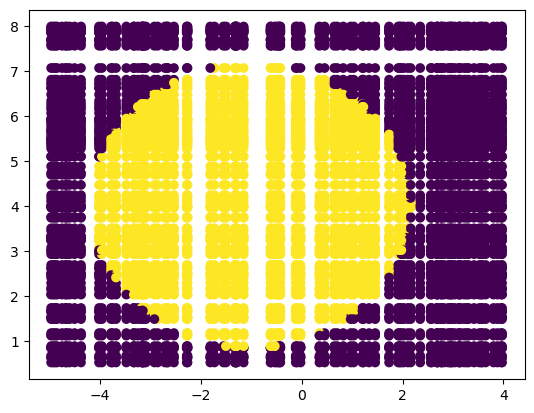

In [8]:
x = np.random.uniform(-5, 4, 100)
y = np.random.uniform(0.5, 8, 100)

X,Y = np.meshgrid(x,y)

plt.figure()
plt.scatter(X,Y, c = bernoulli2(X,Y))

In [9]:
montecarlo2(bernoulli2,-1, 2, -1, 2, 10000)

1.9395

3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

En la Ingeniería Financiera generalmente se utiliza la integración Montecarlo para estimar valores esperados de funciones que dependen de una ovarias variables aleatorias. La integración Montecarlo se puede ver en:

1. Modelos de cartera de inversión: e utiliza para modelar el comportamiento de una cartera de inversión. La variable aleatoria es el rendimiento de los diferentes activos en la cartera, y la función a evaluar es el rendimiento total de la cartera. Se calcula el valor esperado del rendimiento total de la cartera.

2. Análisis de riesgo de crédito: se utiliza para evaluar el riesgo de crédito asociado con una cartera de préstamos. En este caso, la variable aleatoria es la tasa de incumplimiento de los prestatarios, y la función a evaluar es el riesgo de pérdida en caso de que ocurra un incumplimiento. Se calcula el valor esperado del riesgo de pérdida.

3. Valoración de opciones: se utiliza para valorar opciones financieras. La variable aleatoria es el precio del subyacente, y la función a evaluar es el pago de la opción en caso de que se ejerza. Se calcula el valor esperado del pago de la opción.